# Dimensionality Reduction

Our intuition begins to fail dramatically in high dimensions. For example, distance between two random points in a unit square is ~.52. In a 1,000,000 dimensional hypercube, it is ~408! There is a **lot of space** in higher dimensions, allowing for sparsity.


With just 100 features (significantly fewer than in the MNIST problem), you would need more training instances than atoms in the observable universe in order for training instances to be within 0.1 of each other on average, assuming they were spread out uniformly across all dimen‐ sions.

Because features are often correlated or constant, they can occupy a subspace of a high dimensional space. Like a surface in 3d

A surface is also known as a manifold - a shape embedded in a higher dimension.

Theoretically, most datasets are a manifold in a higher dimensional space. Consider generating a bunch of random images - the chance that one is a digit is extremely small! 

## PCA (Principle Component Analysis)

Most popular dimensionality reduction algorithm. How do you choose the right hyperplane? You want to minimize the mean square distance, or preserve the variance of the dataset. A line is drawn that maximizes the variance, then another line orthogonal is drawn that maximizes variance again. This is done n times for n dimensions. The *ith* component is called the *ith principle component (PC) of the data)*

#### How to extract principal components? 

## *Singular Value Decomposition (SVD)*

*Singular Value Decomposition (SVD)* can decompose matrix **X** into 3 matrices $U\sum V^T$, where $V$ contains the unit vectors of all principle components

>Here sigma is a matrix

#### PCA assumes that data is centered around the origin

## Projecting to d Dimensions

This is the matrix multiplication of the first d columns of V

$$X_{d-projection}=XW_d$$

In [2]:
import numpy as np 
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

/opt/homebrew/Caskroom/miniforge/base/envs/DataScience/lib/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X_train.shape

(56000, 784)

In [4]:
from sklearn.decomposition import PCA

X_centered = X - X.mean(axis=0)

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X_centered)

print(f"Old shape: {X_centered.shape[1]}")
print(f"New shape: {X2D.shape[1]}")

Old shape: 784
New shape: 2


### Explained variance ratio

Here, the **explained variance ratio** of each principle component indicates the proportion of the variance that lies along each component.

In [5]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

### Choosing the Right Number of Dimensions

It is simpler to choose the number of dimensions that add up to a sufficiently large portion of the variance (maybe 95%?).

In [6]:
pca = PCA()
pca.fit(X_centered)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

n_components=d

In [7]:
np.int16(np.round(cumsum,2)*100)

array([ 10,  17,  23,  28,  33,  38,  41,  44,  47,  49,  51,  53,  55,
        56,  57,  60,  61,  62,  63,  64,  66,  67,  68,  68,  69,  70,
        71,  72,  72,  73,  74,  74,  75,  76,  76,  77,  77,  78,  78,
        79,  79,  80,  80,  80,  81,  81,  82,  82,  82,  83,  83,  83,
        83,  84,  84,  84,  85,  85,  85,  85,  86,  86,  86,  86,  86,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  88,  88,  89,  89,
        89,  89,  89,  89,  90,  90,  90,  90,  90,  90,  90,  90,  91,
        91,  91,  91,  91,  91,  91,  91,  91,  91,  92,  92,  92,  92,
        92,  92,  92,  92,  92,  92,  92,  93,  93,  93,  93,  93,  93,
        93,  93,  93,  93,  93,  93,  93,  93,  94,  94,  94,  94,  94,
        94,  94,  94,  94,  94,  94,  94,  94,  94,  94,  94,  94,  95,
        95,  95,  95,  95,  95,  95,  95,  95,  95,  95,  95,  95,  95,
        95,  95,  95,  95,  95,  95,  95,  95,  95,  96,  96,  96,  96,
        96,  96,  96,  96,  96,  96,  96,  96,  96,  96,  96,  9

Above, we find the first index which reaches .95, then set index+1 to be the # of components

Thankfully, SKLearn has an argument for this

In [8]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

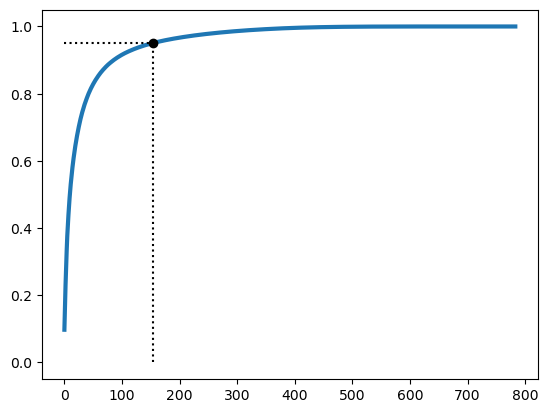

In [10]:
plt.plot(cumsum, linewidth=3)

plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, .95, "ko")

plt.show()

In [11]:
len(pca.explained_variance_ratio_)

154

In [12]:
X.shape[1]/X_reduced.shape[1]

5.090909090909091

## Incremental PCA

The PCA implementations requre the entire training set to fit in memory for the application to run. Incremental PCA (IPCA) allows for one to split the training set into mini-batches and feed the algorithm one batch at a time.



In [13]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

## Kernel PCA (kPCA)

Projects instances into a high-dimensional space (called *feature space*) that enables nonlinear classification and regression with Support Vector Machines)

## Selecting a Kernel

kPCA is an unsupervised learning algorithm, so there are no obvious performance measures to select the best kernel and hyperparameter values.

Often, dimensionality reduction is used before a supervised learning task like classification.

`GridSearchCV` can be used to find the best gamma values and kernels

Selecting the kernel and hyperparamters that yield the lowest reconstruction error is another option

The `fit_inverse_transform` parameter trains a supervised regression model with projected instances as the training set and original instances as the targets. This allows for the `inverse_transform` function.

In [14]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma=.0433,
                   fit_inverse_transform=True)

In [ ]:
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf.inverse_transform(X_reduced)

### This is the reconstructon error

In [ ]:
from sklearn.metric import mean_squared_error
mean_squared_error(X, X_preimage